In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans

In [8]:
df=pd.read_csv("income details.csv")
df.head()

,age,salary
0,27,70000
1,29,90000
2,29,61000
3,28,65000
4,42,150000


Text(0, 0.5, 'Salary')

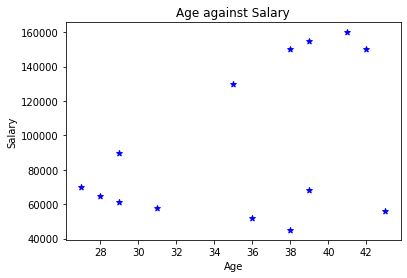

In [9]:
plt.scatter(df['age'],df['salary'],color='blue',marker='*')
plt.title("Age against Salary")
plt.xlabel("Age")
plt.ylabel("Salary")

In [13]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
y_predicted=km.fit_predict(df[['age','salary']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
df['predicted']=y_predicted
df.head()

,age,salary,predicted
0,27,70000,0
1,29,90000,2
2,29,61000,0
3,28,65000,0
4,42,150000,1


In [17]:
df.tail()

,age,salary,predicted
9,36,52000,0
10,38,45000,0
11,39,68000,0
12,43,56000,0
13,31,58000,0


No handles with labels found to put in legend.


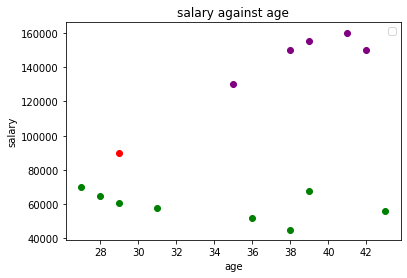

In [21]:
df0=df[df.predicted==0]
df1=df[df.predicted==1]
df2=df[df.predicted==2]
plt.scatter(df0.age,df0['salary'],color='green')

plt.scatter(df1.age,df1['salary'],color='purple')
plt.scatter(df2.age,df2['salary'],color='red')
plt.xlabel("age")
plt.ylabel("salary")
plt.title('salary against age')
plt.legend()

In [22]:
from sklearn .preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()
scaler.fit(df[['salary']])
df['salary']=scaler.transform(df[['salary']])

scaler.fit(df[['age']])
df['age']=scaler.transform(df[['age']])
df

,age,salary,predicted
0,0.0000,0.217391,0
1,0.1250,0.391304,2
2,0.1250,0.139130,0
3,0.0625,0.173913,0
4,0.9375,0.913043,1
5,0.7500,0.956522,1
6,0.8750,1.000000,1
7,0.6875,0.913043,1
8,0.5000,0.739130,1
9,0.5625,0.060870,0


In [37]:
#fitting the model again using the scaled data
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age','salary']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0], dtype=int32)

In [42]:
df['predicted']=y_predicted

df

,age,salary,predicted
0,0.0000,0.217391,0
1,0.1250,0.391304,0
2,0.1250,0.139130,0
3,0.0625,0.173913,0
4,0.9375,0.913043,1
5,0.7500,0.956522,1
6,0.8750,1.000000,1
7,0.6875,0.913043,1
8,0.5000,0.739130,1
9,0.5625,0.060870,2


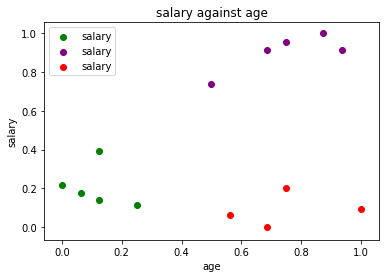

In [46]:
df0=df[df.predicted==0]
df1=df[df.predicted==1]
df2=df[df.predicted==2]
plt.scatter(df0.age,df0['salary'],color='green', label='salary')

plt.scatter(df1.age,df1['salary'],color='purple' ,label='salary')
plt.scatter(df2.age,df2['salary'],color='red', label='salary')
plt.xlabel("age")
plt.ylabel("salary")
plt.title('salary against age')
plt.legend()

In [44]:
km.cluster_centers_

array([[0.1125    , 0.20695652],
       [0.75      , 0.90434783],
       [0.75      , 0.08913043]])

In [51]:
#use of elbow method
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','salary']])
    sse.append(km.inertia_)

In [52]:
sse

[3.5061550811841746,
 1.2961029720646924,
 0.36212689035916823,
 0.24988090737240073,
 0.16649086326402018,
 0.12381539953528672,
 0.09423049090264651,
 0.05860165111058603,
 0.029184684152488996]

Text(0, 0.5, 'SSE')

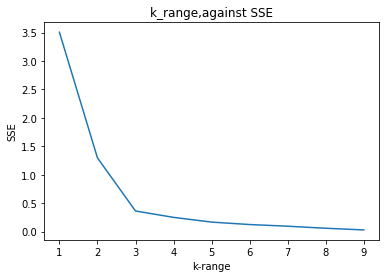

In [54]:
plt.plot(k_range,sse)
plt.title("k_range,against SSE")
plt.xlabel("k-range")
plt.ylabel("SSE")